##  Modeling the Impact of the canopy wind parameter for the exponential wind profile on simulation of below canopy wind speed in the Reynolds Mountain East catchment using pySUMMA

## 1. Introduction

One part of the Clark et al. (2015) study explored the impact of the choice of the canopy wind parameter for the exponential wind profile on simulations of below canopy wind speed at the aspen site in the Reynolds Mountain East catchment. This study looked at the impact of the Canopy wind parameter[0.10, 0.28, 0.50, 0.750] as used in the parameterization described by the exponential wind profile.

In this Jupyter Notebook, the pySUMMA library is used to reproduce this analysis. According to the application of different Canopy wind parameter[0.10, 0.28, 0.50, 0.750], the sensitivity of result describes. 
The Results section shows how to use pySUMMA and the Pandas library to reproduce Figure 2 from Clark et al. (2015). 

Collectively, this Jupyter Notebook serves as an example of how hydrologic modeling can be conducted directly within a Jupyter Notebook by leveraging the pySUMMA library. 

## 2. Background

### Wind profile through the canopy

In describing wind profiles, we depart from the positive-downward coordinate system used in the rest of the paper and use the variable h (m) to define the height above the soil surface (h is defined as positive-upward). This is done to maintain consistency with the presentation in previous papers.

There are substantial inter-model differences in parameterization of wind profiles through the canopy: for example, the original model of Choudhury and Monteith [1988] developed for wheat assumes an exponential reduction in wind speed through the canopy extends to the ground surface, and this parameteriztion has been directly applied by Niu and Yang [2004] for forests. In contrast, Mahat et al. [2013] and Andreadis et al. [2009] assume winds follow a logarithmic profile from the upper boundary to the top of the canopy, an exponential profile within the canopy, and a logarithmic profile again below the canopy.

The Mahat et al. [2013] parameterization is

\begin{equation*}
u(h) = \frac{1}{k}u_{*}^{veg}ln(\frac{h-d}{z_{0}^{veg}})    \mspace{350mu}                        h \geq h_{top}^{veg}
\end{equation*}
\begin{equation*}
\mspace{50mu} u(h) = u(h_{top}^{veg})exp[-a_{w}(1-\frac{h}{h_{top}^{veg}})]    \mspace{250mu}   h_{bot}^{veg} \le h \lt h_{top}^{veg}    \mspace{50mu}                   (1)
\end{equation*}
\begin{equation*}
u(h) = \frac{1}{k}u_{*}^{sfc}ln(\frac{h}{z_{0}^{sfc}})    \mspace{360mu}    h \lt h_{bot}^{veg}
\end{equation*}

where $u(h)$ $(m s^{-1})$ is the wind speed at height h (m),  $a_{w}$(-) is an exponential wind decay coefficient, d (m) is the zero-plane displacement height, $u_{*}^{\Omega}$ $(m s^{-1})$ is the friction velocity $(\Omega = sfc, veg)$, k≈0.4 is von Karman’s constant, $z_{0}^{veg}$ and $z_{0}^{sfc}$ (m) define the roughness length of the vegetation canopy and the surface, and $h_{top}^{veg}$ and $h_{bot}^{veg}$ (m) define the height of the top and the bottom of the vegetation canopy.

The friction velocity $u_{*}^{\Omega}$ is defined as

\begin{equation*}
u_{*}^{veg} = \frac{ku_{air}}{ln(\frac{h_{air}-d}{z_{0}^{veg}})}
\end{equation*}

\begin{equation*}
u_{*}^{sfc} = \frac{ku_{bot}^{veg}}{ln(\frac{h_{bot}^{veg}}{z_{0}^{sfc}})}
\end{equation*}

where $u_{air}$ and $u_{bot}^{veg}$ (m s-1) define the wind speed at the model forcing level $h_{air}$ and the height of the bottom of the vegetation (vegboth).

The parameterizations of wind profiles depend critically on the exponential decay coefficient describing reduction in windspeed throughout the canopy, i.e., $a_{w}$ in equation (1) is both represented as constant across all vegetation types (e.g.,  $a_{w}$ = 3 as in Niu and Yang [2004]), or parameterized in terms of the leaf area index, canopy height, and leaf dimension as [Norman et al., 1995]

\begin{equation*}
a_{w} = a_{w,0}(V_{ex})^{2/3} \frac{(h_{top}^{veg})^{1/3}}{(S_{leaf})^{1/3}}
\end{equation*}

where $a_{w,0}$ $\approx$ 0.28 and $S_{leaf}$ (m) is the mean leaf size given by four times the leaf area divided by the leaf perimeter. These parameterizations can have a large impact on the form of the wind profile and the turbulent fluxes within and above the canopy.

## 3. Methods

### 1) Install pySUMMA from GitHub (UVA-Hydroinformatics/pysumma-develop branch)

In [ ]:
# On HydroShare, pySUMMA installed, so users don't need to install pySUMMA.
# !/opt/conda/bin/pip install git+https://github.com/uva-hydroinformatics/pysumma.git@develop

### 2) Download SUMMA Model Instance from HydroShare

In [1]:
from pysumma.utils import utils   

In [2]:
resource_id = '4064a7b014094f50aa63730e4a3ff976'
instance = utils.download_model_instance(resource_id)

In [ ]:
!cd SummaModel_ReynoldsAspenStand_WindAttenuation_sopron/; chmod +x ./installTestCases_local.sh
!cd SummaModel_ReynoldsAspenStand_WindAttenuation_sopron/; ./installTestCases_local.sh

### 3) Study Area

#### The Reynolds Mountain East catchment is located in southwestern Idaho as shown in the figure below.

In [3]:
from ipyleaflet import Map, GeoJSON
import json, os

In [4]:
m = Map(center=[43.06745, -116.75489], zoom=15)
with open(os.getcwd() + '/' + instance + '/data/reynolds_geojson_latlon.geojson') as f:
    data = json.load(f)
g = GeoJSON(data=data)
m.add_layer(g)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### 4) Create pySUMMA Simulation Object

In [5]:
from pysumma.Simulation import Simulation

In [6]:
# path to the SUMMA filemanager file
file_manager = os.getcwd() + '/' + instance + '/settings/summa_fileManager_riparianAspenWindParamPerturb.txt'

In [7]:
# Create pySUMMA Simulation Object
S = Simulation(case_data = file_manager)

ModelOuput master file filepath: /home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_WindAttenuation_sopron/settings/meta/var_lookup.f90


### 5) Check parameter and parameterization and Run SUMMA for the different canopy wind parameters

In [8]:
# check the simulation start and finish times
S.decision_obj.simulStart.value, S.decision_obj.simulFinsh.value

('2005-07-01 00:00', '2008-09-30 00:00')

#### 5-1) Checkcanopy wind parameters

In [9]:
# create a trial parameter object to check canopy wind parameters
import xarray as xr
Param_trial = xr.open_dataset(os.path.dirname(file_manager)+'/'+S.para_trial.value)
Param_trial.windReductionParam

<xarray.DataArray 'windReductionParam' (hru: 5)>
array([ 0.1 ,  0.28,  0.5 ,  0.75,  1.  ])
Dimensions without coordinates: hru

#### 5.2) Check the exponential wind profile method

In [10]:
# check the exponential wind profile method
S.decision_obj.windPrfile.options

['exponential', 'logBelowCanopy']

In [11]:
# check the current exponential wind profile method 
S.decision_obj.windPrfile.value = 'exponential'
S.decision_obj.windPrfile.value 

'exponential'

In [12]:
S.output_prefix.value = "wind_speed"

#### 5.3) Simulate SUMMA with the different canopy wind parameters and the exponential wind profile method

In [13]:
# run the model giving the output the prefix "wind_spped"
S.executable = "/code/bin/summa.exe"
results_windspeed, output_sim_path = S.execute(run_suffix="wind_speed", run_option = 'local')

/home/jovyan/libs/specworker/__init__.py:4: Warning: The SPECS library is in beta development, use at your own risk.
  warnings.warn("The SPECS library is in beta development, use at your own risk.", Warning)


Job finished                                           
task complete
file_master is '/tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_WindAttenuation_sopron/settings/summa_fileManager_riparianAspenWindParamPerturb.txt_tmp'.
start at 18:56:17
Name of Model Output control file: /tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_WindAttenuation_sopron/settings/meta/Model_Output.txt
decisions file =  /tmp/summa/home/jovyan/work/notebooks/data/c1bb4a12bff44bf08c5958cba7947348/c1bb4a12bff44bf08c5958cba7947348/data/contents/SummaModel_ReynoldsAspenStand_WindAttenuation_sopron/settings/summa_zDecisions_riparianAspenUEB2stream.txt
   1 simulStart: 2005-07-01 00:00
   2 simulFinsh: 2008-09-30 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallB

In [14]:
# get xarry output and output path if you executed SUMMA.
S.output_prefix.value = "wind_speed"
results_windspeed, output_sim_path = S.get_output("cuahsi_sopron", S.output_prefix.value)

## 4. Results

### Recreate the Figure 2 plot from Clark et al., 2015: The Impact of the canopy wind parameter for the exponential wind profile on simulation of below canopy wind speed in the Reynolds Mountain East catchment using pySUMMA

In [15]:
from pysumma.Plotting import Plotting
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import pandas as pd
jtplot.figsize(x=10, y=10)

#### 1) Creating method to get output, forcing, and validation data

#### Method to get hourly model output  

In [16]:
# resample specific variable data during certain period hourly
def hourly_ouput(summa_result, output_variable, start_date, end_date):
    # get certain variable data from output netCDF
    variable_data = summa_result[output_variable] 
    # create dates(X-axis) attribute 
    dates = variable_data.coords['time'].data
    # create data value(Y-axis) attribute 
    data_values = variable_data.data
    # create two dimensional tabular data structure 
    variable_data_df = pd.DataFrame(data_values, index=dates)
    # round time to nearest hour (ex. 2006-10-01T00:59:59.99 -> 2006-10-01T01:00:00)
    variable_data_df.index = variable_data_df.index.round("H")
    # set the time period to display plot 
    variable_data_df = variable_data_df.loc[start_date:end_date] 
    # resample data by the average value hourly
    variable_data_df_hourly = variable_data_df.resample("H").mean()
    
    return variable_data_df_hourly

#### Method to get hourly forcing data

In [17]:
# resample specific variable data during certain period hourly
def hourly_forcing(forcing_path, variable, start_date, end_date):
    # create xarray dataset from forcing file
    forcing_xr = xr.open_dataset(forcing_path)
    # get certain variable data from xarray dataset
    variable_data = forcing_xr[variable]
    # create dates(X-axis) attribute 
    dates = variable_data.coords['time'].data
    # create data value(Y-axis) attribute 
    data_values = variable_data.data
    # create two dimensional tabular data structure 
    variable_data_df = pd.DataFrame(data_values, index=dates)
    # round time to nearest hour (ex. 2006-10-01T00:59:59.99 -> 2006-10-01T01:00:00)
    variable_data_df.index = variable_data_df.index.round("H")
    # set the time period to display plot 
    variable_data_df = variable_data_df.loc[start_date:end_date]
    # resample data by the average value hourly
    variable_data_df_hourly = variable_data_df.resample("H").mean()

    return variable_data_df_hourly

#### Method to get hourly valdation data (observation data)

In [18]:
# resample specific variable data during certain period hourly
def hourly_observation(path, variable, start_date, end_date):
    # create xarray dataset from forcing file
    obs_data = xr.open_dataset(path)
    # get certain variable data from xarray dataset
    obs_wind_speed = obs_data[variable]  #wind
    # create dates(X-axis) attribute
    dates = obs_wind_speed.coords['time'].data
    # create data value(Y-axis) attribute
    data_values = obs_wind_speed.data  
    # create two dimensional tabular data structure 
    obs_wind_speed_df = pd.DataFrame(data_values, index=dates)
    # set the time period to display plot
    obs_wind_speed_df_filt = obs_wind_speed_df.loc[start_date:end_date]
    # select certain stations among three different stations
    obs_wind_speed_df_filt.columns = ['Observation (Aspen understory)','Observation (aspen)','-']
    # groupby data by the average for hour of day
    obs_wind_speed_hr = obs_wind_speed_df_filt.groupby([obs_wind_speed_df_filt.index.date, obs_wind_speed_df_filt.index.hour]).mean()
    # reset index so each row has an hour 
    obs_wind_speed_hr.reset_index(inplace=True)
    # add Date and Time columns for plotting
    xvals = pd.DataFrame({'Date_Time': pd.date_range('10/1/2006 00:00:00', periods=8760, freq='1H')})
    # create hourly wind speed data
    obs_wind_speed_hourly = pd.concat([xvals, obs_wind_speed_hr], axis = 1)
    return obs_wind_speed_hourly #new_df

#### 2) Get Data Frame from specific variables, periods

#### Get model output of wind speed

In [19]:
# check output varible what we want 
results_windspeed

<xarray.Dataset>
Dimensions:                    (gru: 1, hru: 5, ifcSoil: 9, ifcToto: 14, midSoil: 8, midToto: 13, time: 28489)
Coordinates:
  * time                       (time) datetime64[ns] 2005-07-01 ...
  * hru                        (hru) int32 1 2 3 4 5
Dimensions without coordinates: gru, ifcSoil, ifcToto, midSoil, midToto
Data variables:
    pptrate                    (time, hru) float64 ...
    airtemp                    (time, hru) float64 ...
    hruId                      (hru) int32 ...
    basin__SurfaceRunoff       (time, gru) float64 ...
    basin__ColumnOutflow       (time, gru) float64 ...
    basin__AquiferStorage      (time, gru) float64 ...
    basin__AquiferRecharge     (time, gru) float64 ...
    basin__AquiferBaseflow     (time, gru) float64 ...
    basin__AquiferTranspire    (time, gru) float64 ...
    averageInstantRunoff       (time, gru) float64 ...
    averageRoutedRunoff        (time, gru) float64 ...
    nSnow                      (time, hru) int32 ...


In [20]:
# Create data frame object to get wind speed data from model output
sim_wind_speed = hourly_ouput(results_windspeed, 'scalarWindspdCanopyBottom', '2006-10-01', '2007-09-30')

In [21]:
sim_wind_speed.head() # model_output

,0,1,2,3,4
2006-10-01 00:00:00,0.874746,0.433970,0.184242,0.069595,0.026289
2006-10-01 01:00:00,1.076867,0.534422,0.226981,0.085779,0.032417
2006-10-01 02:00:00,0.908823,0.451176,0.191702,0.072480,0.027404
2006-10-01 03:00:00,0.909040,0.451434,0.191890,0.072585,0.027456
2006-10-01 04:00:00,0.942933,0.468421,0.199192,0.075382,0.028527


####  Get forcing data of wind speed 

In [22]:
# get forcing data path
forcing_path =file_manager.split('/settings')[0]+'/data/forcingData/forcing_above_aspenPP.nc'

In [23]:
# check forcing varible what we want 
forcing_variables = Plotting(forcing_path)
forcing_variables.open_netcdf()

<xarray.Dataset>
Dimensions:    (hru: 5, time: 87672)
Coordinates:
  * time       (time) datetime64[ns] 1998-10-01T00:59:59.999996640 ...
Dimensions without coordinates: hru
Data variables:
    hruId      (hru) int32 ...
    latitude   (hru) float64 ...
    longitude  (hru) float64 ...
    data_step  timedelta64[ns] ...
    LWRadAtm   (time, hru) float64 ...
    SWRadAtm   (time, hru) float64 ...
    airpres    (time, hru) float64 ...
    airtemp    (time, hru) float64 ...
    pptrate    (time, hru) float64 ...
    spechum    (time, hru) float64 ...
    windspd    (time, hru) float64 ...
Attributes:
    dataset_orig_path:  /d2/anewman/summa/summaTestCases/testCases_data/input...
    history:            Tue Sep 27 21:53:08 2016: ncrename -d nHRU,hru ./inpu...
    NCO:                "4.6.0"

In [24]:
# Create data frame object to get wind speed data from forcing data
forcing_wind_speed = hourly_forcing(forcing_path, 'windspd', '2006-10-01', '2007-09-30')
forcing_wind_speed.head() # wind_forcing

,0,1,2,3,4
2006-10-01 00:00:00,2.6,2.6,2.6,2.6,2.6
2006-10-01 01:00:00,3.2,3.2,3.2,3.2,3.2
2006-10-01 02:00:00,2.7,2.7,2.7,2.7,2.7
2006-10-01 03:00:00,2.7,2.7,2.7,2.7,2.7
2006-10-01 04:00:00,2.8,2.8,2.8,2.8,2.8


####  Get validation data(observation data) of wind speed  

In [25]:
# get validation data path
valdata_path =file_manager.split('/settings')[0]+'/data/validationData/ReynoldsCreek_eddyFlux.nc'

In [26]:
# check observation varible what we want 
obs_variables = Plotting(valdata_path)
obs_variables.open_netcdf()

<xarray.Dataset>
Dimensions:      (station: 3, time: 87696)
Coordinates:
  * station      (station) |S30 b'176b-AspenUnderstory' b'176d-Aspen' ...
  * time         (time) datetime64[ns] 2004-01-01 2004-01-01T00:30:00 ...
Data variables:
    date         (time) |S30 ...
    time_of_day  (time) |S30 ...
    rncnr        (time, station) float64 ...
    FC-wpl       (time, station) float64 ...
    LE-wpl       (time, station) float64 ...
    H-wpl        (time, station) float64 ...
    Scan         (time, station) float64 ...
    G            (time, station) float64 ...
    Rn-S-G       (time, station) float64 ...
    turbFlux     (time, station) float64 ...
    error        (time, station) float64 ...
    LECor        (time, station) float64 ...
    HCor         (time, station) float64 ...
    rsd          (time, station) float64 ...
    rsu          (time, station) float64 ...
    rld          (time, station) float64 ...
    rlu          (time, station) float64 ...
    wind         (time

In [27]:
# Create data frame object to get wind speed data from observation data
obs_wind_speed = hourly_observation(valdata_path, 'wind', '2006-10-01', '2007-09-30')

#### 3) Create the plotting of the above canopy wind speed

In [28]:
# create each object to create new Dataframe
time = obs_wind_speed['Date_Time'].values
obs_wind_speed1 = obs_wind_speed['Observation (aspen)'].values
forcing_wind_speed = forcing_wind_speed[0].values

In [29]:
# Create Data Frame to merge forcing and observation data
above_canopy_wind_speed = pd.DataFrame({'Observed windspeed at the "exposed" site':forcing_wind_speed, 'Observed windspeed above the Aspen canopy':obs_wind_speed1}, index=time)
above_canopy_wind_speed = above_canopy_wind_speed[['Observed windspeed at the "exposed" site', 'Observed windspeed above the Aspen canopy']]
above_canopy_wind_speed.head()

,"Observed windspeed at the ""exposed"" site",Observed windspeed above the Aspen canopy
2006-10-01 00:00:00,2.6,NaN
2006-10-01 01:00:00,3.2,NaN
2006-10-01 02:00:00,2.7,NaN
2006-10-01 03:00:00,2.7,NaN
2006-10-01 04:00:00,2.8,NaN


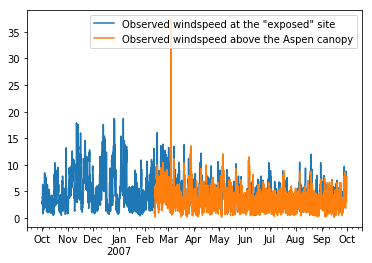

In [30]:
# Plotting above canopy wind speed (SUMMA 2nd Paper Figure2-right above)
above_canopy_wind_speed.plot()
jtplot.figsize(x=20, y=4)

#### 4) Create the plotting of  the below canopy wind speed

In [31]:
# create each object to create new Dataframe
sim_wind_speed1 = sim_wind_speed[1].values
obs_wind_speed2 = obs_wind_speed['Observation (Aspen understory)'].values

In [32]:
# Create Data Frame to merge forcing and observation data
below_canopy_wind_speed = pd.DataFrame({'Simulated windspeed below the Aspen canopy':sim_wind_speed1, 'Observed windspeed below the Aspen canopy':obs_wind_speed2}, index=time)
below_canopy_wind_speed.head()

,Observed windspeed below the Aspen canopy,Simulated windspeed below the Aspen canopy
2006-10-01 00:00:00,0.22705,0.433970
2006-10-01 01:00:00,0.40650,0.534422
2006-10-01 02:00:00,0.46735,0.451176
2006-10-01 03:00:00,0.40700,0.451434
2006-10-01 04:00:00,0.43690,0.468421


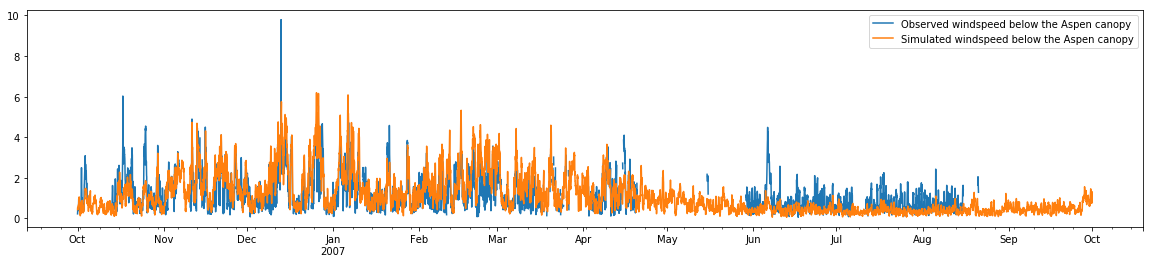

In [33]:
# Plotting below canopy wind speed (SUMMA 2nd Paper Figure2-right below)
below_canopy_wind_speed.plot()
jtplot.figsize(x=20, y=4)

#### 4) Create the plotting of Exceedance probability

#### Case-1) Canopy wind parameter = 0.10

In [34]:
# Check wind speed data from SUMMA output
sim_wind_speed.head()

,0,1,2,3,4
2006-10-01 00:00:00,0.874746,0.433970,0.184242,0.069595,0.026289
2006-10-01 01:00:00,1.076867,0.534422,0.226981,0.085779,0.032417
2006-10-01 02:00:00,0.908823,0.451176,0.191702,0.072480,0.027404
2006-10-01 03:00:00,0.909040,0.451434,0.191890,0.072585,0.027456
2006-10-01 04:00:00,0.942933,0.468421,0.199192,0.075382,0.028527


In [35]:
# Sort column '0' value as ascending order to apply the case of canopy wind parameter 0.10
sim_wind_speed_0_10_sort = sim_wind_speed.sort_values(by=[0])
sim_wind_speed_0_10_sort.head()

,0,1,2,3,4
2007-06-13 02:00:00,0.144510,0.057858,0.018901,0.005301,0.001487
2007-06-07 22:00:00,0.148167,0.061469,0.020973,0.006180,0.001821
2006-10-14 06:00:00,0.190115,0.105310,0.051158,0.022521,0.009915
2007-07-26 04:00:00,0.194602,0.073708,0.022500,0.005842,0.001517
2007-07-05 23:00:00,0.196130,0.075121,0.023247,0.006131,0.001617


In [36]:
# Create rank column to link with sorting data
sim_wind_speed_0_10_sort.insert(0, 'rank', range(0, len(sim_wind_speed)))

In [37]:
sim_wind_speed_0_10_sort.head()

,rank,0,1,2,3,4
2007-06-13 02:00:00,0,0.144510,0.057858,0.018901,0.005301,0.001487
2007-06-07 22:00:00,1,0.148167,0.061469,0.020973,0.006180,0.001821
2006-10-14 06:00:00,2,0.190115,0.105310,0.051158,0.022521,0.009915
2007-07-26 04:00:00,3,0.194602,0.073708,0.022500,0.005842,0.001517
2007-07-05 23:00:00,4,0.196130,0.075121,0.023247,0.006131,0.001617


In [38]:
# Create the object of the exceedance probability
sim_wind_speed_0_10_sort['prob_0'] = 1 - sim_wind_speed_0_10_sort['rank']/(len(sim_wind_speed)+1)

In [39]:
sim_wind_speed_0_10_sort.head()

,rank,0,1,2,3,4,prob_0
2007-06-13 02:00:00,0,0.144510,0.057858,0.018901,0.005301,0.001487,1.000000
2007-06-07 22:00:00,1,0.148167,0.061469,0.020973,0.006180,0.001821,0.999886
2006-10-14 06:00:00,2,0.190115,0.105310,0.051158,0.022521,0.009915,0.999772
2007-07-26 04:00:00,3,0.194602,0.073708,0.022500,0.005842,0.001517,0.999658
2007-07-05 23:00:00,4,0.196130,0.075121,0.023247,0.006131,0.001617,0.999543


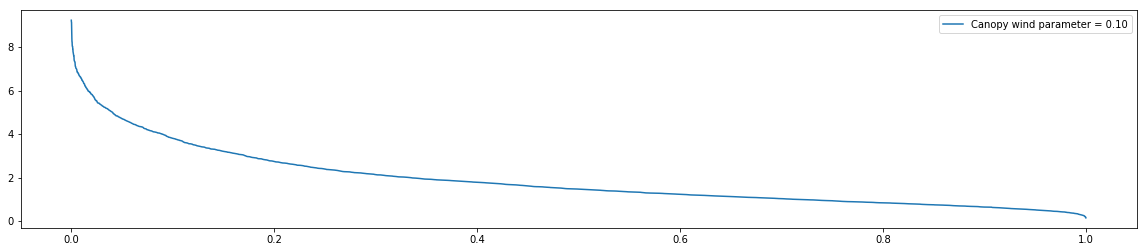

In [40]:
# Create Data frame with Exceedance probability(X-axix) and values(Y-axix) and Plotting
wind_speed_0_10_prob = pd.DataFrame({'Canopy wind parameter = 0.10':sim_wind_speed_0_10_sort[0].values}, index = sim_wind_speed_0_10_sort['prob_0'].values)
wind_speed_0_10_prob.plot()

#### Case-2) Canopy wind parameter = 0.28

In [41]:
# Check wind speed data from SUMMA output
sim_wind_speed.head()
sim_wind_speed_0_28_sort = sim_wind_speed.sort_values(by=[1])

In [42]:
sim_wind_speed_0_28_sort.insert(0, 'rank', range(0, len(sim_wind_speed)))

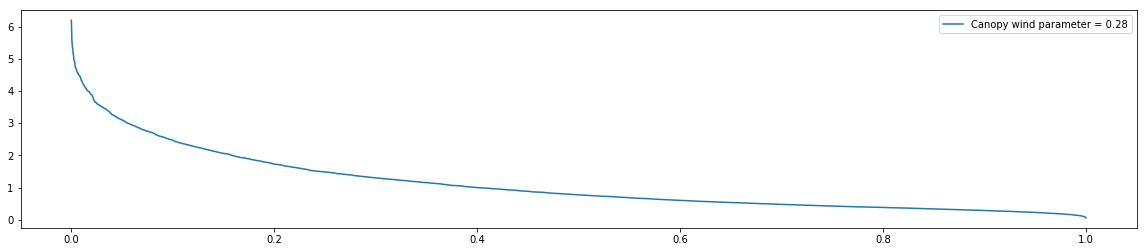

In [43]:
sim_wind_speed_0_28_sort['prob_0_28'] = 1 - sim_wind_speed_0_28_sort['rank']/(len(sim_wind_speed)+1)
wind_speed_0_28_prob = pd.DataFrame({'Canopy wind parameter = 0.28':sim_wind_speed_0_28_sort[1].values}, index = sim_wind_speed_0_28_sort['prob_0_28'].values)
wind_speed_0_28_prob.plot()

#### Case-3) Canopy wind parameter = 0.50

In [44]:
# Check wind speed data from SUMMA output
sim_wind_speed.head()
sim_wind_speed_0_50_sort = sim_wind_speed.sort_values(by=[2])

In [45]:
sim_wind_speed_0_50_sort.insert(0, 'rank', range(0, len(sim_wind_speed)))

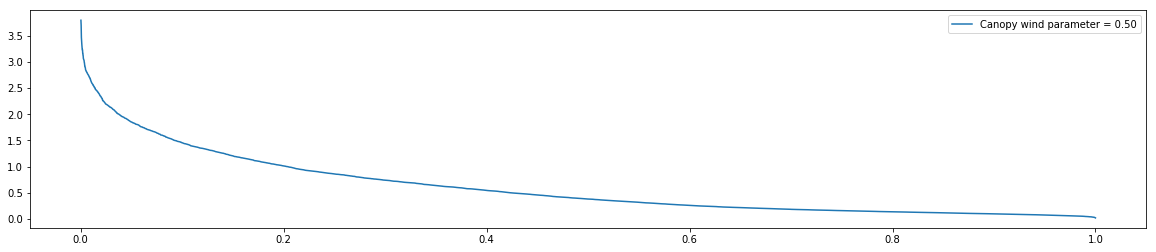

In [46]:
sim_wind_speed_0_50_sort['prob_0_50'] = 1 - sim_wind_speed_0_50_sort['rank']/(len(sim_wind_speed)+1)
wind_speed_0_50_prob = pd.DataFrame({'Canopy wind parameter = 0.50':sim_wind_speed_0_50_sort[2].values}, index = sim_wind_speed_0_50_sort['prob_0_50'].values)
wind_speed_0_50_prob.plot()

#### Case-4) Canopy wind parameter = 0.75

In [47]:
# Check wind speed data from SUMMA output
sim_wind_speed.head()
sim_wind_speed_0_75_sort = sim_wind_speed.sort_values(by=[3])

In [48]:
sim_wind_speed_0_75_sort.insert(0, 'rank', range(0, len(sim_wind_speed)))

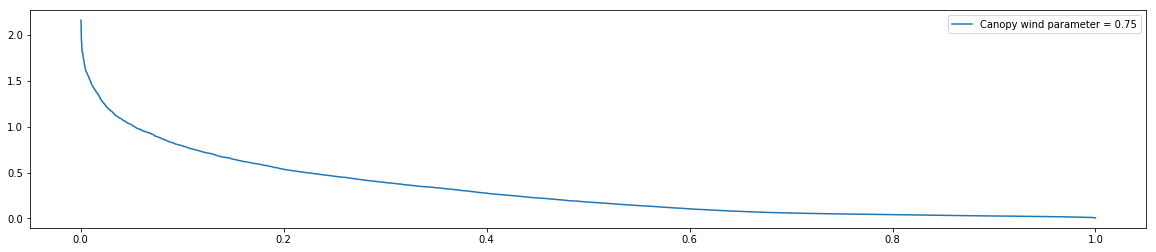

In [49]:
sim_wind_speed_0_75_sort['prob_0_75'] = 1 - sim_wind_speed_0_75_sort['rank']/(len(sim_wind_speed)+1)
wind_speed_0_75_prob = pd.DataFrame({'Canopy wind parameter = 0.75':sim_wind_speed_0_75_sort[3].values}, index = sim_wind_speed_0_75_sort['prob_0_75'].values)
wind_speed_0_75_prob.plot()

#### Get Below-canopy observation from validation data

In [50]:
# Check validation data
obs_wind_speed.head()

,Date_Time,level_0,level_1,Observation (Aspen understory),Observation (aspen),-
0,2006-10-01 00:00:00,2006-10-01,0,0.22705,NaN,3.0145
1,2006-10-01 01:00:00,2006-10-01,1,0.40650,NaN,2.2605
2,2006-10-01 02:00:00,2006-10-01,2,0.46735,NaN,1.9130
3,2006-10-01 03:00:00,2006-10-01,3,0.40700,NaN,2.8460
4,2006-10-01 04:00:00,2006-10-01,4,0.43690,NaN,2.6405


In [51]:
# Sort column 'Observation (Aspen understory)' as ascending order to apply the Below canopy observation
obs_wind_speed_sort = obs_wind_speed.sort_values(by=['Observation (Aspen understory)'])
# Remove missing data to make exact exceedance probability
obs_wind_speed_sort_data = obs_wind_speed_sort['Observation (Aspen understory)'].dropna()

In [52]:
# Create Data frame
obs_wind_speed_sort_data = pd.DataFrame(obs_wind_speed_sort_data)

In [53]:
# Create 'rank' column to link with sorting data
obs_wind_speed_sort_data.insert(0, 'rank', range(0, len(obs_wind_speed_sort_data)))
# Create the object of the exceedance probability
obs_wind_speed_sort_data['prob_obs'] = 1 - obs_wind_speed_sort_data['rank']/(len(obs_wind_speed_sort_data)+1)

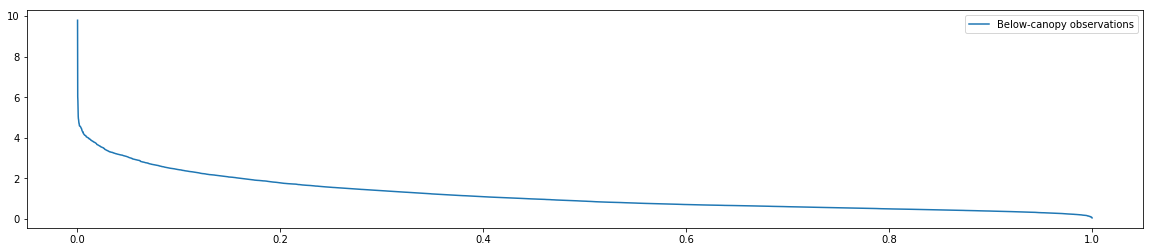

In [54]:
# Create Data frame with Exceedance probability(X-axix) and values(Y-axix) and Plotting
obs_wind_speed_graph = pd.DataFrame({'Below-canopy observations':obs_wind_speed_sort_data['Observation (Aspen understory)'].values}, index=obs_wind_speed_sort_data['prob_obs'].values)
obs_wind_speed_graph.plot()

#### Get combined Exceedance Probability Plot (Figure 2, left in SUMMA 2nd paper)

In [55]:
# merge each exceedance probability plot with the different canopy wind parameter
Exceed_prob = pd.concat([wind_speed_0_10_prob, wind_speed_0_28_prob, wind_speed_0_50_prob, wind_speed_0_75_prob], axis=1)
Exceed_prob.columns = ['Canopy wind parameter = 0.10', 'Canopy wind parameter = 0.28', 'Canopy wind parameter = 0.50', 'Canopy wind parameter = 0.75']

In [56]:
Exceed_prob.head()

,Canopy wind parameter = 0.10,Canopy wind parameter = 0.28,Canopy wind parameter = 0.50,Canopy wind parameter = 0.75
1.000000,0.144510,0.057858,0.018901,0.005301
0.999886,0.148167,0.061469,0.020973,0.005842
0.999772,0.190115,0.073708,0.022500,0.006131
0.999658,0.194602,0.075121,0.023247,0.006180
0.999543,0.196130,0.075414,0.023403,0.006191


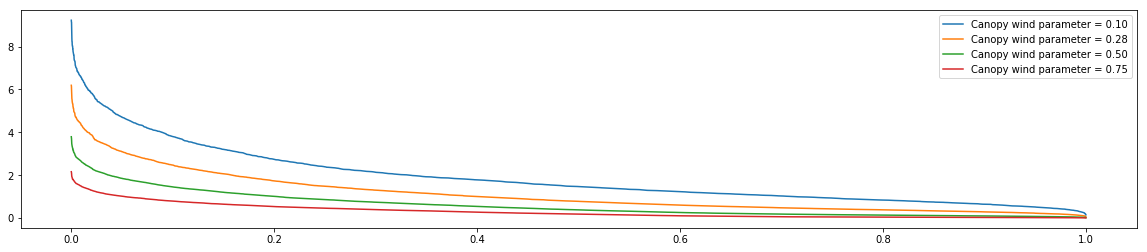

In [57]:
Exceed_prob.plot()

#### Add obserevation data into previous combined plot (Figure 2, left in SUMMA 2nd paper)

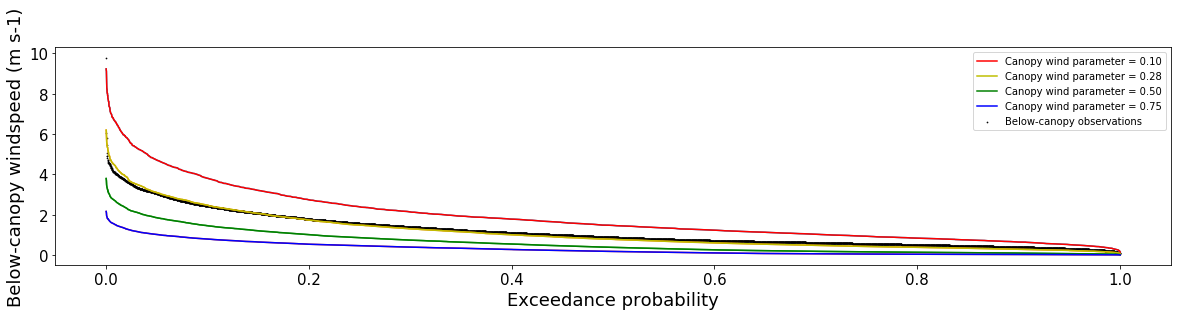

In [58]:
# reset the name of legend and color
Exceed_prob_combine = Exceed_prob.plot(legend=False)
Exceed_prob_combine.plot(Exceed_prob['Canopy wind parameter = 0.10'],color='r') 
Exceed_prob_combine.plot(Exceed_prob['Canopy wind parameter = 0.28'], color='y')
Exceed_prob_combine.plot(Exceed_prob['Canopy wind parameter = 0.50'], color='g')
Exceed_prob_combine.plot(Exceed_prob['Canopy wind parameter = 0.75'], color='b')

Exceed_prob_combine.tick_params(labelsize = 15)
# plot scatter with x='exceedance probability', y='Observation (Aspen understory)'
d = Exceed_prob_combine.scatter(obs_wind_speed_sort_data['prob_obs'].values, obs_wind_speed_sort_data['Observation (Aspen understory)'], color='black', s=0.5, label="Below-canopy observations")
# add x, y label
Exceed_prob_combine.set_xlabel("Exceedance probability", fontsize=18)
Exceed_prob_combine.set_ylabel("Below-canopy windspeed (m s-1)", fontsize=18)

handles, labels = Exceed_prob_combine.get_legend_handles_labels()
# show up the legend
Exceed_prob_combine.legend(handles[4:9], labels[4:9])
jtplot.figsize(x=15, y=15)

## 5. Discussion

As stated in Clark et al., 2015, the following insights can be gained from this analysis:
* The simulations in Figure 2(left) illustrate that perturbations in the canopy wind parameter used to define the
exponential canopy wind profile (parameter $a_{w,0}$ defined in Clark et al. [2015a]) cause large variability in the
simulations of below-canopy wind speed.
* Although default values of the canopy wind parameter provide a
reasonable match to observations (right plot of Figure 2), perturbations in the canopy wind parameter can
modify below-canopy wind speed by a factor of five.

## 6. Post a renewal Model Instance, SUMMA output, and notebook back to Hydroshare

In [59]:
from pysumma.hydroshare import hydroshare
hs = hydroshare.hydroshare()

Successfully established a connection with HydroShare


In [60]:
# zip a renewal SUMMA Model Instance to upload on HydroShare
import shutil, os
archive_name = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance +'_new'))
root_dir = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance))
shutil.make_archive(archive_name, 'zip', root_dir)
Model_instance = os.getcwd() +'/' + instance +'_new.zip'

In [61]:
# set meta data such as abstract, title, keywords, rtype to create a new SUMMA Model Instance
title = 'The Impact of the canopy wind parameter for the exponential wind profile of SUMMA Model in Aspen stand at Reynolds Mountain East_LAI_new'
abstract = 'The Impact of the canopy wind parameter for the exponential wind profile of SUMMA Model in Aspen stand at Reynolds Mountain East_LAI(new)'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'exponential wind profile', 'wind speed')
rtype = 'ModelInstanceResource'
fpath = Model_instance,
metadata = '[{"creator":{"name":"Youngdon Choi"}}, {"creator":{"name":"Jeffrey Sadler"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [62]:
# create a new SUMMA Model Instance on HydroShare
resource_id1 = hs.createHydroShareResource(title=title, content_files=fpath, keywords=keywords, abstract=abstract, resource_type='modelinstanceresource', public=False)

Resource Created Successfully                           


In [63]:
# set meta data such as abstract, title, keywords, rtype to create a SUMMA Composite Resource that contains SUMMA Model instance, output, and notebook.
title = 'The Impact of the canopy wind parameter for the exponential wind profile of SUMMA Model in Aspen stand at Reynolds Mountain East_LAI_new'
abstract = 'The Impact of the canopy wind parameter for the exponential wind profile of SUMMA Model in Aspen stand at Reynolds Mountain East_LAI(new)'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'exponential wind profile', 'wind speed')
rtype = 'CompositeResource'
files = output_sim_path,
metadata = '[{"creator":{"name":"Youngdon Choi"}}, {"creator":{"name":"Jeffrey Sadler"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [64]:
# create a new SUMMA Composite Resource on HydroShare
resource_id2 = hs.createHydroShareResource(title=title, content_files=files, keywords=keywords, abstract=abstract, resource_type='compositeresource', public=False)

Resource Created Successfully                           


In [65]:
# add a new SUMMA Model Instance to a new SUMMA Composite Resource.
hs.addContentToExistingResource(resource_id2, [Model_instance])

Successfully Added Content Files                      


#### Save this notebook file and add the notebook to the resource

In [66]:
# add a new notebook to a new SUMMA Composite Resource.
npath = os.getcwd() +'/SummaModel_ReynoldsAspenStand_WindSpeed.ipynb'
# check the resource id on HS that created.
hs.addContentToExistingResource(resource_id2, [npath])

Successfully Added Content Files                      
